In [15]:
import json
import pandas as pd

# Load the JSON file
with open('llm_eval_q.json', 'r') as f:
    data = json.load(f)

# Convert the JSON data into a pandas DataFrame
df = pd.DataFrame(data)
automatic_evaluation_df = df['automatic_evaluation'].apply(pd.Series)
df = pd.concat([df.drop(columns=['automatic_evaluation']), automatic_evaluation_df], axis=1)
df = df.drop(columns=['llm_eval', 'query'])
average_scores = df.mean()

average_scores
# Print the DataFrame to verify
df, average_scores

(    rouge_l          bleu    meteor  bert_score
 0  0.666667  4.544362e-01  0.758527    0.925760
 1  0.252874  2.841955e-02  0.214797    0.870055
 2  0.451613  1.870441e-01  0.482062    0.891120
 3  0.159420  8.348473e-79  0.173611    0.850062
 4  0.495238  1.071139e-01  0.531965    0.894360
 5  0.604651  3.718421e-01  0.645761    0.927261
 6  0.142857  6.076398e-79  0.144928    0.844085
 7  0.335404  4.903383e-02  0.385964    0.869385
 8  0.275229  5.259900e-02  0.419023    0.877083
 9  0.354430  9.686208e-02  0.457671    0.893985,
 rouge_l       0.373838
 bleu          0.134735
 meteor        0.421431
 bert_score    0.884316
 dtype: float64)

In [25]:
with open('avg_scores.json', 'r') as f:
  llm_eval_average = json.load(f)
df_transposed = df.set_index('key').T
df_transposed.reset_index(drop=True, inplace=True)

# Rename columns by inserting "_avg" before "_score"
df_transposed.columns = [col.replace('_score', '_avg_score') for col in df_transposed.columns]

df_transposed

,appropriateness_avg_score,information_usage_avg_score,relevance_avg_score,depth_and_elaboration_avg_score,accuracy_avg_score,coherence_avg_score,overall_avg_score,essential_completeness_avg_score
0,8.909091,8.727273,9.636364,7.272727,9.636364,8.545455,8.636364,9.818182


In [26]:
df_transposed.to_clipboard(index=False)

PyperclipException: 
    Pyperclip could not find a copy/paste mechanism for your system.
    For more information, please visit
    https://pyperclip.readthedocs.io/en/latest/index.html#not-implemented-error
    

In [28]:
df_transposed.to_csv('df_transposed.csv', index=False, float_format='%.5f')

df_transposed

,appropriateness_avg_score,information_usage_avg_score,relevance_avg_score,depth_and_elaboration_avg_score,accuracy_avg_score,coherence_avg_score,overall_avg_score,essential_completeness_avg_score
0,8.909091,8.727273,9.636364,7.272727,9.636364,8.545455,8.636364,9.818182


In [32]:
average_scores.to_csv('automatic_evaluation_average.csv', float_format='%.5f')


In [34]:
average_scores.T, df_transposed.T

(rouge_l       0.373838
 bleu          0.134735
 meteor        0.421431
 bert_score    0.884316
 dtype: float64,
                                          0
 appropriateness_avg_score         8.909091
 information_usage_avg_score       8.727273
 relevance_avg_score               9.636364
 depth_and_elaboration_avg_score   7.272727
 accuracy_avg_score                9.636364
 coherence_avg_score               8.545455
 overall_avg_score                 8.636364
 essential_completeness_avg_score  9.818182)

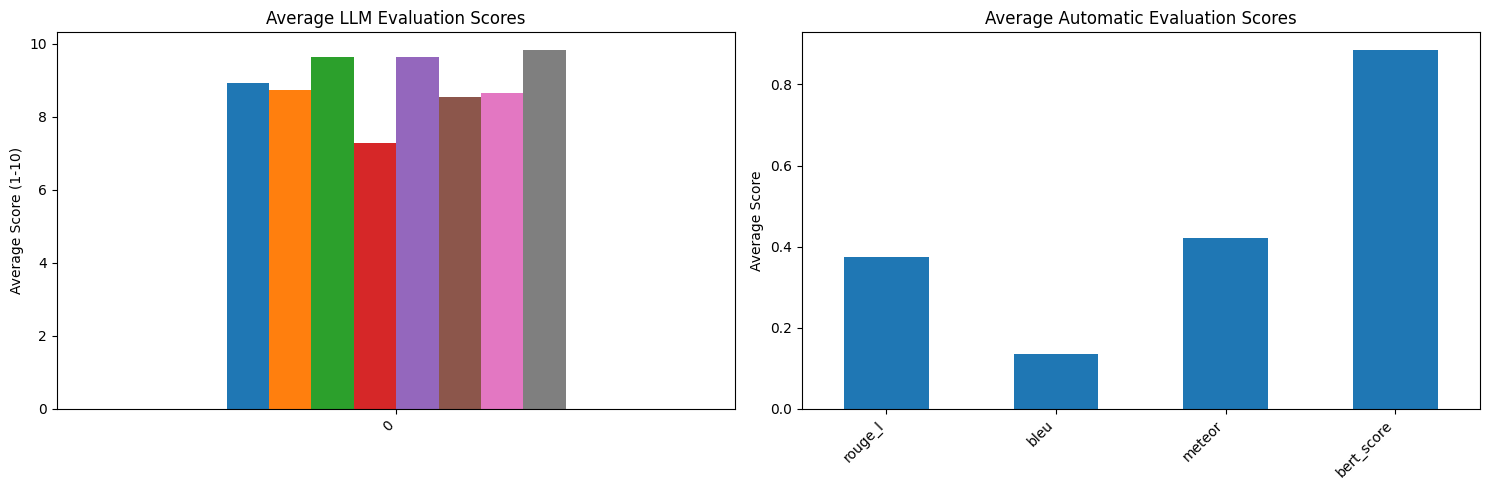

In [33]:

import matplotlib.pyplot as plt
import pandas as pd

# LLM Evaluation Data
llm_data = {'appropriateness_avg_score': 8.90909, 'information_usage_avg_score': 8.72727,
            'relevance_avg_score': 9.63636, 'depth_and_elaboration_avg_score': 7.27273,
            'accuracy_avg_score': 9.63636, 'coherence_avg_score': 8.54545,
            'overall_avg_score': 8.63636, 'essential_completeness_avg_score': 9.81818}

llm_df = df_transposed

# Automatic Evaluation Data
automatic_data = {'rouge_l': 0.37384, 'bleu': 0.13474, 'meteor': 0.42143, 'bert_score': 0.88432}
automatic_df = pd.DataFrame.from_dict(automatic_data, orient='index', columns=['Average Score'])

# Create Bar Charts
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

llm_df.plot(kind='bar', ax=axes[0], legend=False)
axes[0].set_title('Average LLM Evaluation Scores')
axes[0].set_ylabel('Average Score (1-10)')
axes[0].set_xticklabels(llm_df.index, rotation=45, ha='right')

automatic_df.plot(kind='bar', ax=axes[1], legend=False)
axes[1].set_title('Average Automatic Evaluation Scores')
axes[1].set_ylabel('Average Score')
axes[1].set_xticklabels(automatic_df.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()